In [66]:
import pandas as pd
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3560,2024-08-21,222.669998,224.660004,218.860001,223.270004,223.270004,70146000
3561,2024-08-22,223.820007,224.800003,210.320007,210.660004,210.660004,79514500
3562,2024-08-23,214.460007,221.479996,214.210007,220.320007,220.320007,81525200
3563,2024-08-26,218.750000,219.089996,211.009995,213.210007,213.210007,59301200


In [4]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3560,2024-08-21,223.270004
3561,2024-08-22,210.660004
3562,2024-08-23,220.320007
3563,2024-08-26,213.210007


In [6]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month=month, day=day)

datetime_object = str_to_datetime('	2010-06-29')
datetime_object

datetime.datetime(2010, 6, 29, 0, 0)

In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/rq/dczdb3md0kbb6vc41s3nhhq00000gn/T/ipykernel_75733/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3560   2024-08-21
3561   2024-08-22
3562   2024-08-23
3563   2024-08-26
3564   2024-08-27
Name: Date, Length: 3565, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2024-08-21,223.270004
2024-08-22,210.660004
2024-08-23,220.320007


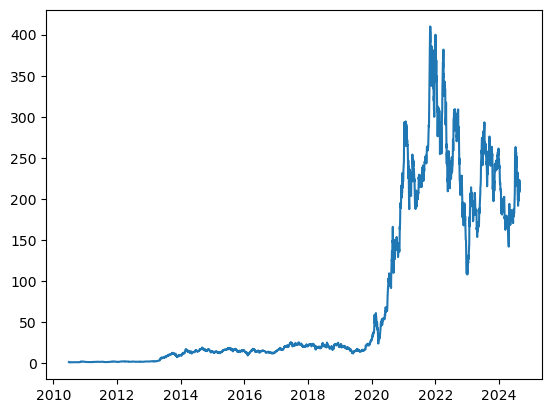

In [17]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [43]:
import numpy as np
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2023-08-29', 
                                '2024-08-27', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-08-29,230.039993,238.589996,238.820007,257.179993
1,2023-08-30,238.589996,238.820007,257.179993,256.899994
2,2023-08-31,238.820007,257.179993,256.899994,258.079987
3,2023-09-01,257.179993,256.899994,258.079987,245.009995
4,2023-09-05,256.899994,258.079987,245.009995,256.489990
...,...,...,...,...,...
246,2024-08-21,216.119995,222.720001,221.100006,223.270004
247,2024-08-22,222.720001,221.100006,223.270004,210.660004
248,2024-08-23,221.100006,223.270004,210.660004,220.320007
249,2024-08-26,223.270004,210.660004,220.320007,213.210007


In [44]:
def windowed_df_to_date_X_y(windowed_dataframe):
  feature_df = windowed_dataframe.drop(columns=['Target'])
  dates = feature_df['Target Date'].to_numpy()

  X = feature_df.to_numpy().reshape((len(dates), feature_df.shape[1], 1))
  Y = windowed_dataframe['Target'].to_numpy(dtype='float64')

  # Convert dates to numerical values for model input
  dates_numerical = np.array(dates, dtype='datetime64[ns]').astype('int64').astype('float64')

  return dates_numerical, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)


((251,), (251, 3, 1), (251,))

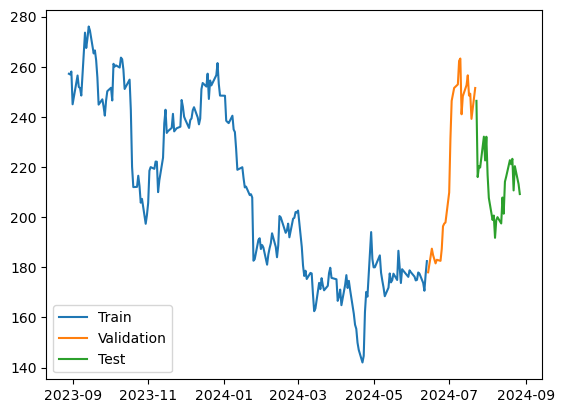

In [64]:

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 44769.2109 - mean_absolute_error: 208.9533 - val_loss: 50437.4414 - val_mean_absolute_error: 222.4338
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44771.6055 - mean_absolute_error: 208.7800 - val_loss: 50167.1992 - val_mean_absolute_error: 221.8266
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44777.0234 - mean_absolute_error: 208.6515 - val_loss: 49857.8594 - val_mean_absolute_error: 221.1282
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44170.1328 - mean_absolute_error: 207.2533 - val_loss: 49478.9688 - val_mean_absolute_error: 220.2709
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43809.4922 - mean_absolute_error: 206.4174 - val_loss: 49020.9688 - val_mean_absolute_error: 219.2267
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43837.6875 - mean_absolute_error: 206.6291 - val_loss: 48388.1406 - val_mean_absolute_error: 217.7690
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


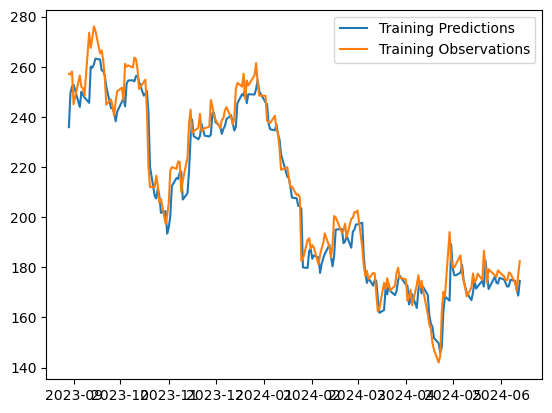

In [56]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Absolute Error: 6.71


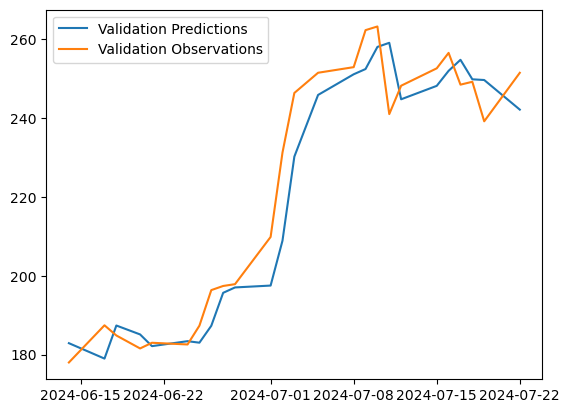

In [71]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

mae = np.mean(np.abs(val_predictions - y_val))
print(f"Mean Absolute Error: {mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Mean Absolute Error: 7.58


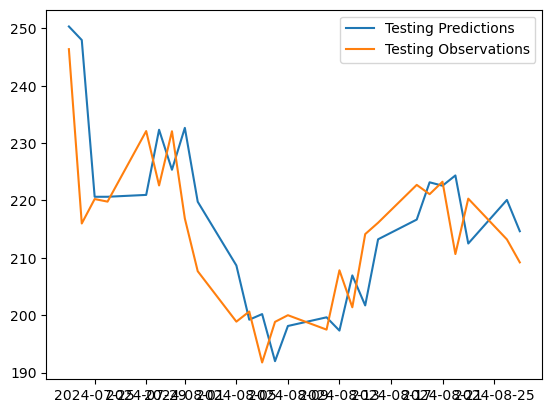

In [72]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

mae = np.mean(np.abs(test_predictions - y_test))
print(f"Mean Absolute Error: {mae:.2f}")

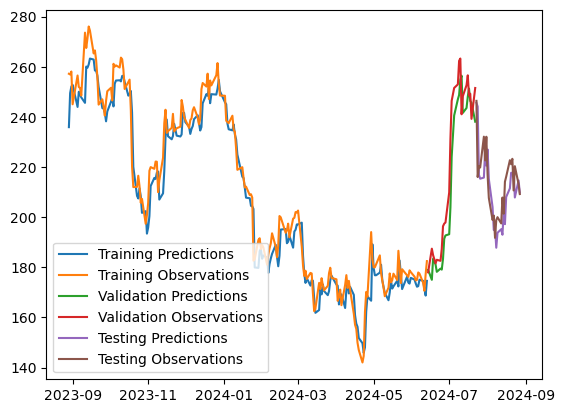

In [59]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [60]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

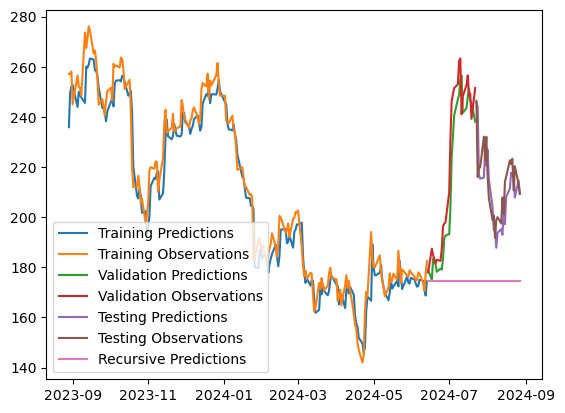

In [61]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])